# ЗАДАНИЕ 11. ПОСТРОЕНИЕ МОДЕЛИ СТОХАСТИЧЕСКОЙ АППРОКСИМАЦИИ

In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [60]:
dataS = pd.read_excel('data.xls', sheet_name='Sales')
dataP = pd.read_excel('data.xls', sheet_name='Prices')
dataI = pd.read_excel('data.xls', sheet_name='Income')

In [61]:
sales = dataS.values[1, 2:]
prices = dataP.values[1, 2:]
income = dataI.values[1, 2:]

In [62]:
X = list(zip(income, prices))

In [63]:
y = sales

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

14677.342713804377
[ -0.30047063 150.0541626 ]


In [67]:
a0=[model.intercept_]
a0

[14677.342713804377]

In [68]:
a1=[model.coef_[0]]
a1

[-0.3004706327002023]

In [69]:
a2=[model.coef_[1]]
a2

[150.05416260165396]

In [70]:
l=0.1
nu = l*np.mean(sales)

In [ ]:
k = 3

In [71]:
sales_sa = []
borderu = []
borderd = []
error = []
gamma = []

In [72]:
sales_sa.append(a0[0] +a1[0] * income[0] + a2[0] * prices[0])
sales_sa

[20882.54230976469]

In [73]:
error.append(sales[0]-sales_sa[0])
error

[417.457690235311]

In [74]:
gamma.append(abs((abs(error[0]) - nu) / error[0]) / k)
gamma

[1.3165577534352078]

In [75]:
borderu.append(sales_sa[0]+nu)
borderu

[22948.821476431356]

In [76]:
borderd.append(sales_sa[0]-nu)
borderd

[18816.263143098022]

In [77]:
for i in range(1,len(sales)): 
    if abs(error[i-1])>nu:
        a0.append(a0[i-1]+gamma[i-1]*error[i-1])
        a1.append(a1[i-1]+gamma[i-1]*error[i-1]/income[i-1])
        a2.append(a2[i-1]+gamma[i-1]*error[i-1]/prices[i-1])
    else:
        a0.append(a0[i-1])
        a1.append(a1[i-1])
        a2.append(a2[i-1])
    sales_sa.append(a0[i] +a1[i] * income[i] + a2[i] * prices[i])
    error.append(sales[i]-sales_sa[i])
    gamma.append(abs((abs(error[i]) - nu) / error[i]) / k)
    borderu.append(sales_sa[i]+nu)
    borderd.append(sales_sa[i]-nu)

In [78]:
# Прогноз по модели Хольта
income_new = np.load('income_new.npy')
income_new

array([16469.2052522 , 16626.14144701, 16783.07764182, 16940.01383663,
       17096.95003145, 17253.88622626, 17410.82242107, 17567.75861588,
       17724.6948107 , 17881.63100551, 18038.56720032, 18195.50339513])

In [79]:
# Прогноз по модели Тейла-Вейджа
prices_new = np.load('prices_new.npy')

In [80]:
sales_new=a0[47] +a1[47] * income_new + a2[47] * prices_new
sales_up=sales_new+nu
sales_down=sales_new-nu

In [81]:
sales_new=list(sales_new)
sales_up=list(sales_up)
sales_down=list(sales_down)

In [82]:
t = np.arange(1, len(y) + 1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [83]:
t_new = np.arange(len(y) + 1,len(y)+13)
t_new

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

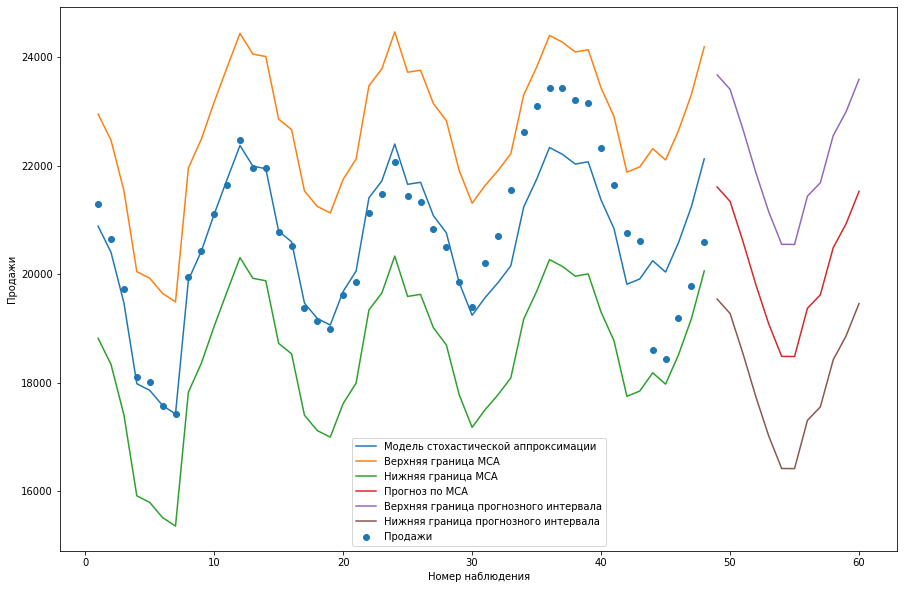

In [84]:
plt.figure(figsize=[15,10])

plt.scatter(t, sales, label = 'Продажи')
plt.plot(t,sales_sa, label = 'Модель стохастической аппроксимации')
plt.plot(t,borderu, label = 'Верхняя граница МСА')
plt.plot(t,borderd, label = 'Нижняя граница МСА')

plt.plot(t_new,sales_new, label = 'Прогноз по МСА')
plt.plot(t_new,sales_up, label = 'Верхняя граница прогнозного интервала')
plt.plot(t_new,sales_down, label = 'Нижняя граница прогнозного интервала')

plt.xlabel("Номер наблюдения")
plt.ylabel("Продажи")
plt.legend()

plt.show()